In [96]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

# Ejercicio 1.a

In [31]:
modulo = 2**32
multiplicador = 1013904223
incremento = 1664525

semilla = (101503+103856+104258+102995)/4

In [4]:
print("Modulo: "+ str(modulo) )
print("Multiplicador: "+ str(modulo) )
print("Incremento: "+ str(incremento) )
print("Semilla: "+ str(semilla) )

Modulo: 4294967296
Multiplicador: 4294967296
Incremento: 1664525
Semilla: 103153.0


### Nuestra funcion de GCL quedaria como

X<sub>(i+1)</sub> = ( X<sub>(i)</sub> * Multiplicador + Incremento ) % modulo

In [124]:
lista = []
listaRepetidos = []

x = semilla

periodo = 0

"""Busco hasta la primera repeticion"""
while x not in lista:
    lista.append(x)
    x = (x * multiplicador + incremento) % modulo
    periodo += 1

    
print("Cantidad de numeros entre semilla y periodo es de "+ str(periodo) )

Cantidad de numeros entre semilla y periodo es de 12876


In [125]:
"""Veo cuantos numero hay hasta la repeticion devuelta"""
periodo = 0

while x not in listaRepetidos:
    listaRepetidos.append(x)
    x = (x * multiplicador + incremento) % modulo
    periodo += 1
    
print("El periodo es de "+ str(periodo) )

El periodo es de 9526


# Ejercicio 1.b

Para que nuestro GCL devuelva numero entre 0 y 1 podemos dividir por el modulo, normalizando el numero obtenido.

X<sub>(i+1)</sub> = ( X<sub>(i)</sub> * Multiplicador + Incremento ) % modulo

X<sub>(i+1)</sub> = X<sub>(i+1)</sub>  / modulo

In [5]:
x = semilla

for i in range(10):
    x = (x * multiplicador + incremento) % modulo
    print(x/modulo)

0.11999037768691778
0.6565184593200684
0.38245856761932373
0.832150936126709
0.3126610517501831
0.7375197410583496
0.0053147077560424805
0.638249876908958
0.527610182762146
0.4007291793823242


# Ejercicio 1.c

In [35]:
""" 
n es la cantidad de numeros a generar

Devuelve una lista con n numeros generados random
"""
def generarRandom(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x)
        x = (x * multiplicador + incremento) % modulo
    return result

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

Generaremos numeros del 0 al 9 con los numeros obtenidos

In [126]:
N = generarRandom(12876)

x,y = np.array_split(N,2) # Divido el array en dos

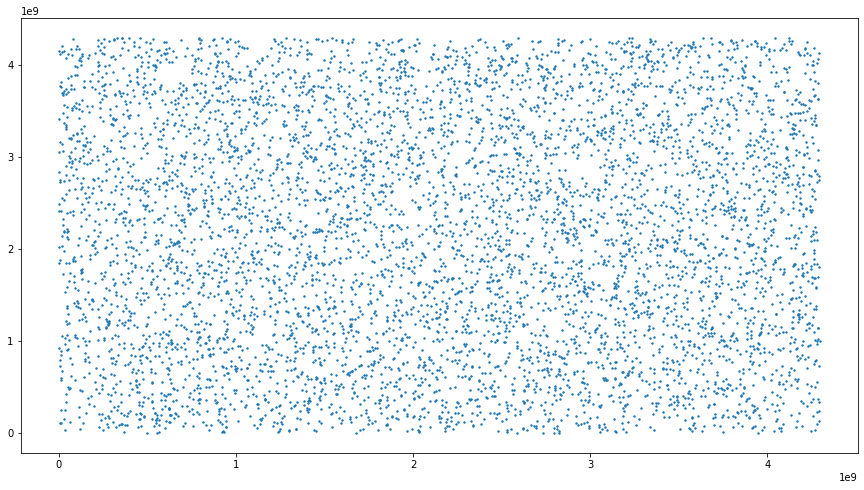

In [147]:
plt.figure(figsize=(15, 8))
ax = plt.scatter(x,y,s=2)
plt.show()

Podemos decir que es lo que esperabamos, ya que estan todos los puntos distribuidos en todo el plano.

Simularemos numeros del 0 al 9 para ver si obtenemos numeros simular

In [131]:
""" Generar numeros de 0 a 9 """

numGenerados = []

for j in range(9,-1,-1):
    numGenerados.append(0)

for i in N:
    for j in range(9,-1,-1):
        if i < modulo/(j+1):
            numGenerados[j] += 1
            break

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 12876


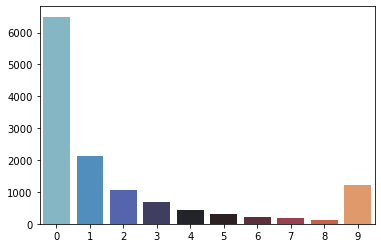

In [129]:
numSimulados = list(range(0,10))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

A priori no podemos decir que no es una distribucion uniforme, pero no podemos confirmarlo. Entonces vamos a hacer un test para ver si es realmente uniforme o no.